# Un projet en maintenance prédictive intégrant plusieurs types de tests d'hypothèse

---

### Contexte du projet

Une usine industrielle souhaite améliorer sa stratégie de maintenance prédictive. Différents indicateurs ont été collectés sur plusieurs machines sur une période d'un an. Tu disposes des données suivantes :

- **Variables continues :**  
  - Température de fonctionnement (°C)  
  - Vibration (mm/s)  
  - Durée d'utilisation avant panne (en jours)

- **Variables discrètes :**  
  - État de défaillance (Oui/Non)  
  - Type de maintenance appliquée (Préventive, Corrective, Prédictive)
  - Catégorie de défaut (A, B, C)

---

### Questions du projet

1. **Proportion de Défaillances :**  
   On suppose qu’en conditions normales, la probabilité qu’une machine présente une défaillance au cours de l’année est de 10 %.
   > **Question :** Quel test utiliser pour vérifier si la proportion observée diffère de 10 % ?  
   > **Indications :** Choisis un test adapté aux données binaires et aux proportions.

2. **Distribution des Catégories de Défaut :**  
   Les défauts observés sur les machines sont classés en catégories A, B et C. La distribution théorique attendue est de 50 % pour A, 30 % pour B et 20 % pour C.  
   > **Question :** Quel test utiliser pour comparer la distribution observée avec la distribution attendue ?  
   > **Indications :** Pense aux tests d'ajustement pour variables discrètes.

3. **Température de Fonctionnement :**  
   La température idéale de fonctionnement d’un équipement est fixée à 75°C. Tu disposes des mesures de température pour un échantillon de machines.  
   > **Question :** Quel test utiliser pour vérifier si la moyenne observée diffère significativement de 75°C ?  
   > **Indications :** Considère un test adapté aux variables continues avec une valeur théorique de référence.

4. **Comparaison de Vibrations selon la Défaillance :**  
   On souhaite comparer les niveaux de vibration entre deux groupes de machines : celles qui ont connu une défaillance et celles qui ne l'ont pas fait.  
   > **Question :** Quel test est indiqué pour comparer les moyennes de vibration de ces deux groupes indépendants ?  
   > **Indications :** Rappelle-toi du test t pour échantillons indépendants.

5. **Impact du Type de Maintenance sur la Durée de Fonctionnement :**  
   Trois stratégies de maintenance (Préventive, Corrective, Prédictive) ont été appliquées. Tu disposes des durées de fonctionnement (en jours) avant panne pour chaque groupe.  
   > **Question :** Quel test permet de déterminer s'il existe une différence significative entre les moyennes de durée d'utilisation selon le type de maintenance ?  
   > **Indications :** Pense à un test permettant de comparer plus de deux groupes.

6. **Relation entre Température et Vibration :**  
   Pour chaque machine, tu as enregistré la température et le niveau de vibration.  
   > **Question :** Quel test utiliser pour évaluer s'il existe une corrélation linéaire entre la température de fonctionnement et le niveau de vibration ?  
   > **Indications :** Réfléchis au test de corrélation entre variables continues.

---

### Instructions

- Pour chaque question, identifie le test statistique le plus approprié en te basant sur les types de variables et l'objectif de l'analyse.
- Prépare le code Python correspondant en utilisant SciPy (et éventuellement d'autres bibliothèques comme NumPy ou pandas).
- Interprète les résultats obtenus pour guider les décisions en maintenance prédictive.

Ce projet te permet de pratiquer tous les tests abordés : test binomial, test Chi², test t (à un échantillon et pour échantillons indépendants), ANOVA et test de corrélation de Pearson. Réfléchis bien à chaque contexte pour choisir la bonne méthode.

Bonne exploration !

In [36]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('machine_data.csv', index_col='machine_id')
df.head()

,defaillance,maintenance,defaut_category,temperature,vibration,duration
machine_id,,,,,,
1,Non,Préventive,B,79.779560,3.944414,238.833797
2,Non,Corrective,A,73.466353,3.961054,171.774972
3,Non,Prédictive,C,72.031186,4.013143,375.383452
4,Non,Prédictive,C,74.622639,3.955899,361.729741
5,Non,Prédictive,C,75.167175,4.289164,280.446023


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1 to 300
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   defaillance      300 non-null    object 
 1   maintenance      300 non-null    object 
 2   defaut_category  300 non-null    object 
 3   temperature      300 non-null    float64
 4   vibration        300 non-null    float64
 5   duration         300 non-null    float64
dtypes: float64(3), object(3)
memory usage: 16.4+ KB


## 1. Proportion de défaillance --> Test binomial

In [21]:
df['defaillance'].value_counts(normalize=True).round(2)

defaillance
Non    0.89
Oui    0.11
Name: proportion, dtype: float64

In [28]:
# Test binomial 
from scipy.stats import binomtest

print("H0; La probabilité d'une machine présente une défaillance au cours de l'année est 10%.\n")

p = 0.1
k = 30
nombre_machines = 300
alpha = 0.05

p_value = binomtest(k=k, n=nombre_machines, p=p).pvalue

if p_value < alpha:
    print("La probabilité d'observer d'une présente une défaillance de 10% cours de l'année est très fiable ! On rejet cette hypothèse.")
else:
    print("Nous n'avons pas suffisamment d'évidences pour rejet H0! cette hypothèse est probablèment juste!")

H0; La probabilité d'une machine présente une défaillance au cours de l'année est 10%.

Nous n'avons pas suffisamment d'évidences pour rejet H0! cette hypothèse est probablèment juste!


## 2. Distribution des catégories de défaut

In [35]:
df['defaut_category'].value_counts(normalize=True)

defaut_category
A    0.503333
B    0.300000
C    0.196667
Name: proportion, dtype: float64

In [40]:
print("H0 : La distribution théorique attendue pour le défaut A 50%, pour le défaut B 30% et 20% pour le défaut A.\n")

alpha = 0.05

expected_frequencies = np.array([0.5, 0.3, 0.2]) * len(df)
observed_frequencies = df['defaut_category'].value_counts(normalize=False).round(2)

from scipy.stats import chisquare
t_stat, p_value = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

if p_value < alpha:
    print("La distribution observée des défauts DIFFERE SIGNIFICATIVEMENT de la distribution attendue.")
else:
    print("La distribution observée des défauts NE DIFFERE PAS SIGNIFICATIVEMENT de la distribution attendue.")


H0 : La distribution théorique attendue pour le défaut A 50%, pour le défaut B 30% et 20% pour le défaut A.

La distribution observée des défauts NE DIFFERE PAS SIGNIFICATIVEMENT de la distribution attendue.


# 3. Température de fonctionnement

In [46]:
print("H0 : La température ideal de fonctionnement d'un équipement est de 75°C.\n")
popmean = 75.0

alpha = 0.05

temp = df['temperature']

from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(a=temp, popmean=popmean)

if p_value < alpha:
    print("La température moyenne de fonctionnement observée DIFFÈRE SIGINIFICATIVEMENT de la température moyenne attendue --> On rejet H0")
else:
    print("La température moyenne de fonctionnement observée NE DIFFÈRE PAS SIGINIFICATIVEMENT de la température moyenne attendue") 



H0 : La température ideal de fonctionnement d'un équipement est de 75°C.

La température moyenne de fonctionnement observée NE DIFFÈRE PAS SIGINIFICATIVEMENT de la température moyenne attendue


4. **Comparaison de Vibrations selon la Défaillance :**

In [76]:
print("H0 : La vibration moyenne est identique entre les machines présentant une défaillance et celles qui n'en présentent pas.\n")

alpha = 0.05

machines_avec_def = df.query("defaillance=='Oui'")['vibration']
machines_sans_def = df.query("defaillance=='Non'")['vibration']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(machines_avec_def, machines_sans_def)

if p_value < alpha:
    print("La vibration moyenne n'est pas identique entre les machines présentant une défaillance et celles qui n'en présentent pas.")
else:
    print("Nous n'avons suffisamment d'évidences pour rejeter H0!")

H0 : La vibration moyenne est identique entre les machines présentant une défaillance et celles qui n'en présentent pas.

La vibration moyenne n'est pas identique entre les machines présentant une défaillance et celles qui n'en présentent pas.



5. **Impact du Type de Maintenance sur la Durée de Fonctionnement :**  
   Trois stratégies de maintenance (Préventive, Corrective, Prédictive) ont été appliquées. Tu disposes des durées de fonctionnement (en jours) avant panne pour chaque groupe.  
   > **Question :** Quel test permet de déterminer s'il existe une différence significative entre les moyennes de durée d'utilisation selon le type de maintenance ?  
   > **Indications :** Pense à un test permettant de comparer plus de deux groupes.

In [87]:
print("H0 : La durée de fonctionnement des machines est la même, quel que soit le type de maintenance appliqué (préventive, corrective ou prédictive)\n")

alpha = 0.05

from scipy.stats import f_oneway
t_stat, p_value = f_oneway(*df.groupby('maintenance')['duration'].apply(list))

if p_value < alpha:
    print("La durée de fonctionnement des machines n'est pas la même pour tous les types de maintenance appliqués")
else:
    print("Nous n'avons pas suffisamment d'évidences pour rejeter H0.")



H0 : La durée de fonctionnement des machines est la même, quel que soit le type de maintenance appliqué (préventive, corrective ou prédictive)

La durée de fonctionnement des machines n'est pas la même pour tous les types de maintenance appliqués


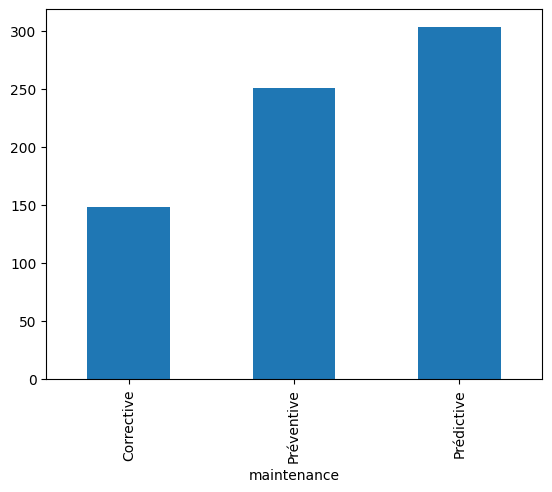

In [92]:
df.groupby('maintenance')['duration'].mean().sort_values().plot.bar();

# 6. Correlation entre Température et Vibration

In [102]:
print("H0 : Il n'exite pas une corrélation linéaire entre la température et les vibrations d'un équipement.\n")

alpha = 0.05

from scipy.stats import pearsonr
t_stat, p_value = pearsonr(df['vibration'], df['temperature'])

if p_value < alpha:
    print("Il existe une relation linéaire entre la température et les vibrations des équipements.")
else:
    print("Nous n'avons pas suffisamment d'évidences pour rejeter H0.")

H0 : Il n'exite pas une corrélation linéaire entre la température et les vibrations d'un équipement.

Nous n'avons pas suffisamment d'évidences pour rejeter H0.


<Axes: xlabel='vibration', ylabel='temperature'>

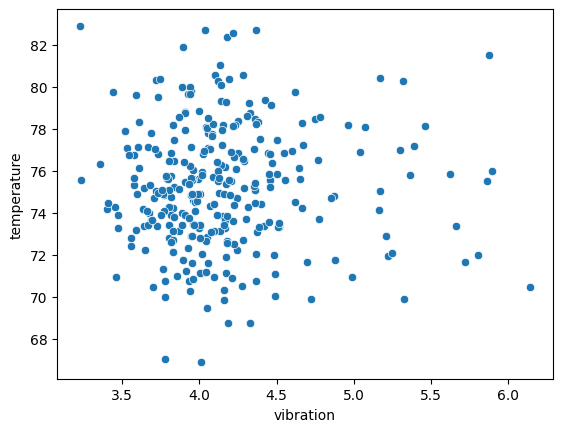

In [99]:
import seaborn as sns
sns.scatterplot(data=df, x=df['vibration'], y=df['temperature'])